In [58]:
import os
print(os.getcwd())

/Users/stuber/Desktop/UA/Lab04


In [60]:
os.chdir("/Users/stuber/Desktop/UA/Lab04")
print(os.getcwd())  

/Users/stuber/Desktop/UA/Lab04


In [62]:
def read_gal(file_path):
    """
    Reading a GAL file.
    """
    gal_dict = {}
    
    with open(file_path, 'r') as f:
        lines = [line.strip() for line in f.readlines() if line.strip()]

    i = 0
    while i < len(lines):
        line = lines[i].split()
        
        if len(line) < 2:
            print(f" Error: Line {i+1} has an incorrect format, skipping: {line}")
            i += 1
            continue

        try:
            unit_id = int(line[0])
            num_neighbors = int(line[1])

            if i + 1 < len(lines):
                neighbors = list(map(int, lines[i + 1].split())) if num_neighbors > 0 else []
            else:
                print(f" Warning: {unit_id} declared {num_neighbors} neighbors, but the file ended prematurely.")
                neighbors = []

            gal_dict[unit_id] = neighbors
            i += 2  # Skip the neighbor list line

        except ValueError:
            print(f" Warning: Line {i+1} contains non-numeric data, skipping: {line}")
            i += 1

    return gal_dict

In [64]:
file_path = "Lab04-1.gal"
gal_dict = read_gal(file_path)

In [66]:
print("adjacency dictionary:")
for key, value in gal_dict.items():
    print(f"{key}: {value}")

adjacency dictionary:
0: [1, 2]
2: [2, 3]
4: [3, 4]
5: [4, 4]
8: [5, 7]
15: [6, 2]
9: [7, 3]
14: [14, 6]
12: [9, 6]
26: [10, 3]
20: [11, 4]
16: [13, 3]
19: [15, 4]
25: [17, 3]
23: [18, 4]
24: [19, 3]
18: [20, 9]
35: [34, 4]
34: [43, 5]
28: [27, 4]
32: [24, 6]
30: [25, 5]
29: [26, 4]
33: [28, 7]
38: [29, 4]
37: [31, 2]
36: [47, 2]
41: [33, 4]
42: [35, 5]
44: []
46: [40, 4]
45: [38, 4]
43: [39, 2]
47: [42, 2]
48: [46, 2]
49: [49, 3]
40: [48, 4]


In [68]:
def neighbor_histogram(gal_dict):
    """
    Computes a histogram of neighbor counts.
    """
    hist_dict = {}
    
    for unit_id, neighbors in gal_dict.items():
        num_neighbors = len(neighbors)
        
        if num_neighbors not in hist_dict:
            hist_dict[num_neighbors] = []
        
        hist_dict[num_neighbors].append(unit_id)
    
    return hist_dict

In [70]:
hist_dict = neighbor_histogram(gal_dict)

In [72]:
print("Neighbour count histogram：")
for key, value in hist_dict.items():
    print(f"{key} neighbors: {value}")

Neighbour count histogram：
2 neighbors: [0, 2, 4, 5, 8, 15, 9, 14, 12, 26, 20, 16, 19, 25, 23, 24, 18, 35, 34, 28, 32, 30, 29, 33, 38, 37, 36, 41, 42, 46, 45, 43, 47, 48, 49, 40]
0 neighbors: [44]


In [74]:
def check_asymmetry(gal_dict):
    """
    Checks for asymmetrical adjacency relations.
    """
    asymmetries = []
    
    for unit_id, neighbors in gal_dict.items():
        for neighbor in neighbors:
            if unit_id not in gal_dict.get(neighbor, []):
                asymmetries.append((unit_id, neighbor))
    
    return asymmetries

In [76]:
asymmetries = check_asymmetry(gal_dict)

In [78]:
if asymmetries:
    print("Asymmetrical relations found:")
    for pair in asymmetries:
        print(f"{pair[0]} -> {pair[1]} is asymmetrical")
else:
    print("All adjacency relations are symmetrical")

Asymmetrical relations found:
0 -> 1 is asymmetrical
0 -> 2 is asymmetrical
2 -> 3 is asymmetrical
4 -> 3 is asymmetrical
5 -> 4 is asymmetrical
5 -> 4 is asymmetrical
8 -> 5 is asymmetrical
8 -> 7 is asymmetrical
15 -> 6 is asymmetrical
15 -> 2 is asymmetrical
9 -> 7 is asymmetrical
9 -> 3 is asymmetrical
14 -> 6 is asymmetrical
12 -> 9 is asymmetrical
12 -> 6 is asymmetrical
26 -> 10 is asymmetrical
26 -> 3 is asymmetrical
20 -> 11 is asymmetrical
20 -> 4 is asymmetrical
16 -> 13 is asymmetrical
16 -> 3 is asymmetrical
19 -> 15 is asymmetrical
19 -> 4 is asymmetrical
25 -> 17 is asymmetrical
25 -> 3 is asymmetrical
23 -> 18 is asymmetrical
23 -> 4 is asymmetrical
24 -> 19 is asymmetrical
24 -> 3 is asymmetrical
18 -> 20 is asymmetrical
18 -> 9 is asymmetrical
35 -> 34 is asymmetrical
35 -> 4 is asymmetrical
34 -> 43 is asymmetrical
34 -> 5 is asymmetrical
28 -> 27 is asymmetrical
28 -> 4 is asymmetrical
32 -> 24 is asymmetrical
32 -> 6 is asymmetrical
30 -> 25 is asymmetrical
30 -> 5

In [80]:
import matplotlib.pyplot as plt

In [82]:
def plot_histogram(hist_dict):
    """
    Plots a histogram of neighbor counts.
    """
    neighbor_counts = list(hist_dict.keys())
    unit_counts = [len(hist_dict[key]) for key in neighbor_counts]

    plt.bar(neighbor_counts, unit_counts, tick_label=neighbor_counts)
    plt.xlabel("Number of Neighbors")
    plt.ylabel("Number of Spatial Units")
    plt.title("Neighbor Count Histogram")
    plt.show()

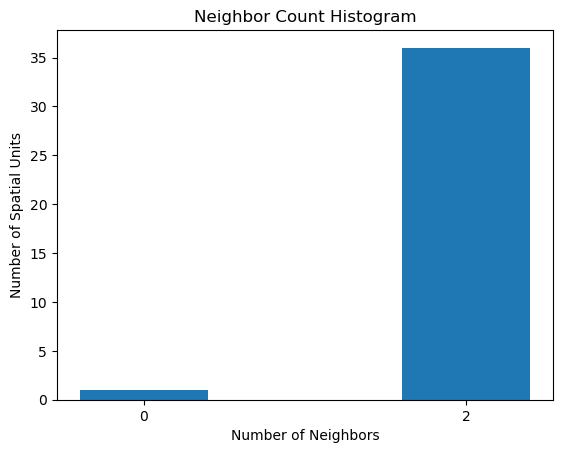

In [84]:
plot_histogram(hist_dict)